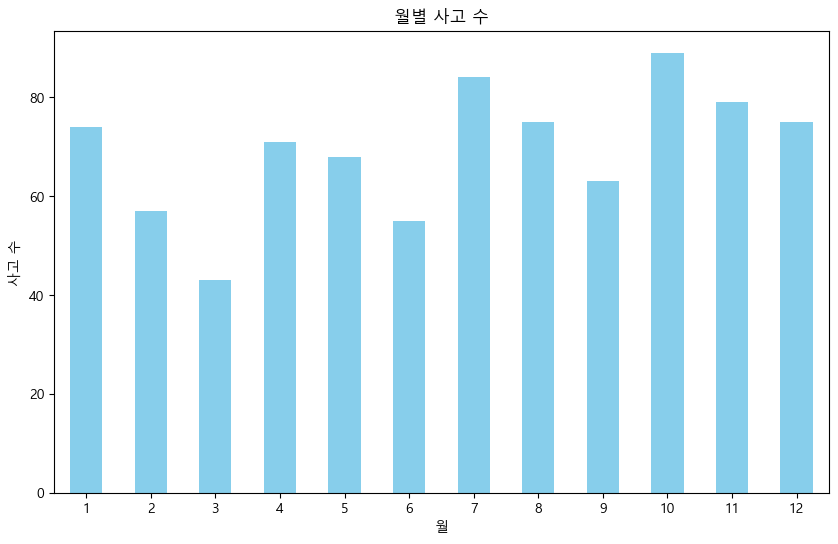

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 한글 폰트 경로 (Windows 기준)
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# CSV 파일 경로
file_path = '경부고속도로_전체_accidentInfoList.csv'

# CSV 파일 읽기 (encoding 지정)
df = pd.read_csv(file_path, delimiter=',', encoding='cp949')

# '사고일시' 컬럼을 datetime 형식으로 변환
df['사고일시'] = pd.to_datetime(df['사고일시'], format='%Y년 %m월 %d일 %H시')

# '월' 컬럼 추가
df['월'] = df['사고일시'].dt.month

# 월별 사고 수 계산
monthly_accidents = df.groupby('월').size()

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))
monthly_accidents.plot(kind='bar', color='skyblue')
plt.title('월별 사고 수')
plt.xlabel('월')
plt.ylabel('사고 수')
plt.xticks(rotation=0)
plt.show()

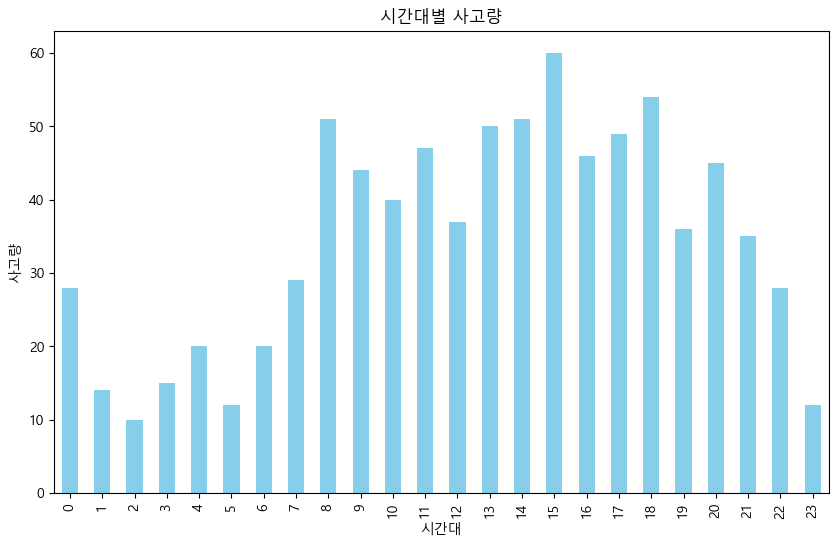

In [2]:

# '사고일시' 컬럼을 datetime 형식으로 변환
df['사고일시'] = pd.to_datetime(df['사고일시'], format='%Y년 %m월 %d일 %H시')

# '시간대' 컬럼 추가
df['시간대'] = df['사고일시'].dt.hour

# 시간대별 사고량 계산
시간대별_사고수 = df['시간대'].value_counts().sort_index()

# 막대그래프 그리기
plt.figure(figsize=(10, 6))
시간대별_사고수.plot(kind='bar', color='skyblue')
plt.title('시간대별 사고량')
plt.xlabel('시간대')
plt.ylabel('사고량')
plt.show()

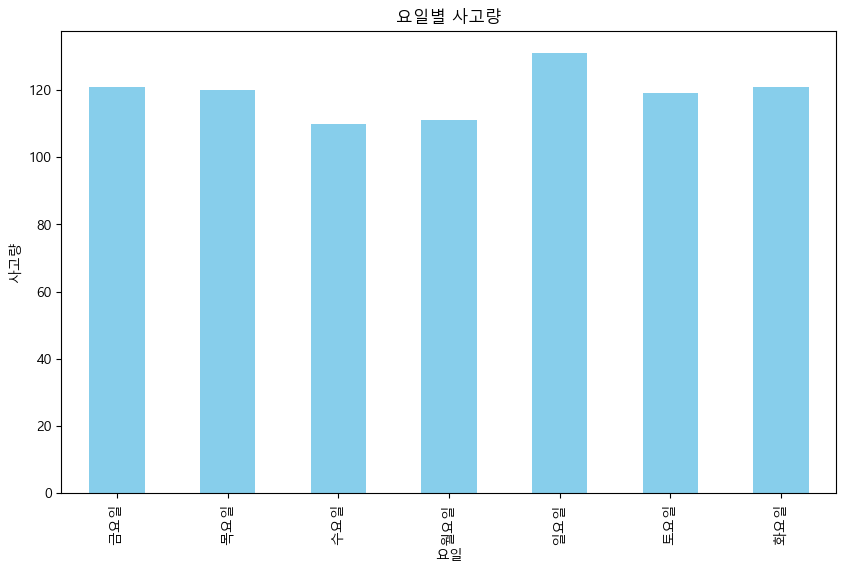

In [3]:
# '사고일시' 컬럼을 datetime 형식으로 변환
df['사고일시'] = pd.to_datetime(df['사고일시'], format='%Y년 %m월 %d일 %H시')

# '요일' 컬럼을 기준으로 그룹화하여 사고 수 계산
요일별_사고수 = df['요일'].value_counts().sort_index()

# 막대그래프 그리기
plt.figure(figsize=(10, 6))
요일별_사고수.plot(kind='bar', color='skyblue')
plt.title('요일별 사고량')
plt.xlabel('요일')
plt.ylabel('사고량')
plt.show()

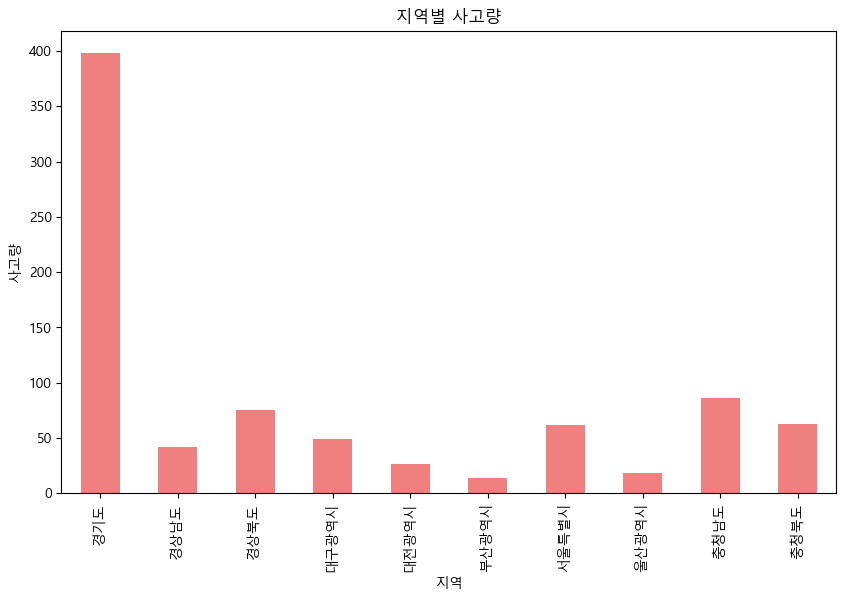

In [4]:
# '시군구' 컬럼에서 첫번째 영역 추출하여 새로운 컬럼 생성
df['지역'] = df['시군구'].apply(lambda x: x.split()[0])

# '지역' 컬럼을 기준으로 그룹화하여 사고 수 계산
지역별_사고수 = df['지역'].value_counts().sort_index()

# 막대그래프 그리기
plt.figure(figsize=(10, 6))
지역별_사고수.plot(kind='bar', color='lightcoral')
plt.title('지역별 사고량')
plt.xlabel('지역')
plt.ylabel('사고량')
plt.show()

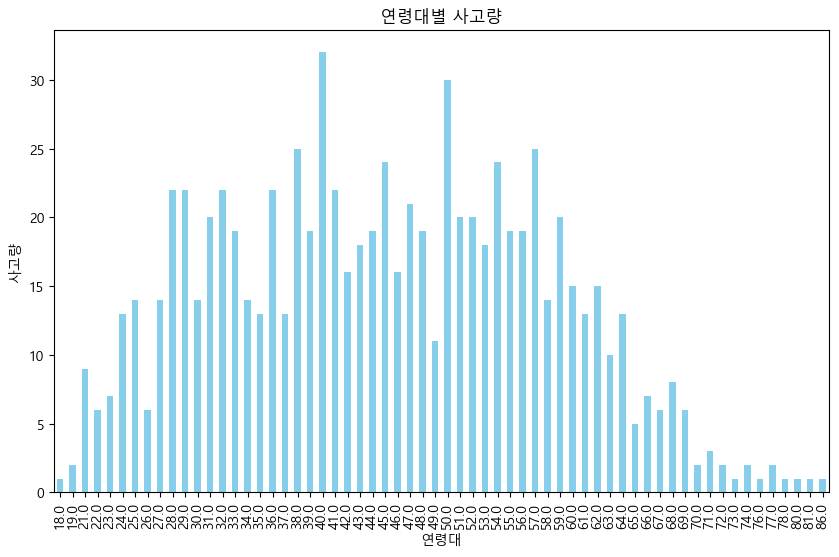

In [5]:
# 피해운전자 연령대 레이블 생성
df['피해자_연령대'] = df['피해운전자 연령'].apply(lambda x: int(x[:-1]) if pd.notna(x) and x[-1] == '세' else None)

# '피해자_연령대' 컬럼을 기준으로 그룹화하여 사고 수 계산
연령대별_사고수 = df['피해자_연령대'].value_counts().sort_index()

# 막대그래프 그리기
plt.figure(figsize=(10, 6))
연령대별_사고수.plot(kind='bar', color='skyblue')
plt.title('연령대별 사고량')
plt.xlabel('연령대')
plt.ylabel('사고량')
plt.show()

In [6]:
# 가해자 연령대 레이블 생성
df['피해자_연령'] = df['피해운전자 연령'].apply(lambda x: int(x[:-1]) if x[-1] == '세' else 0)  # 세 제거 후 정수 변환
피해자_연령대 = pd.cut(df['피해자_연령'], bins=[0, 19, 29, 39, 49, 59, 69, 130], labels=['10대 이하', '20대', '30대', '40대', '50대', '60대', '70대 이상'], right=False)

# 가해자 연령대별 사고 수 계산
피해자_연령대별_사고수 = 피해자_연령대.value_counts().sort_index()

# 막대그래프 그리기
plt.figure(figsize=(12, 6))
피해자_연령대별_사고수.plot(kind='bar', color='skyblue')
plt.title('피해자 연령대별 사고량')
plt.xlabel('피해자 연령대')
plt.ylabel('사고량')
plt.xticks(rotation=45, ha='right')  # X축 레이블 회전
plt.show()

TypeError: 'float' object is not subscriptable

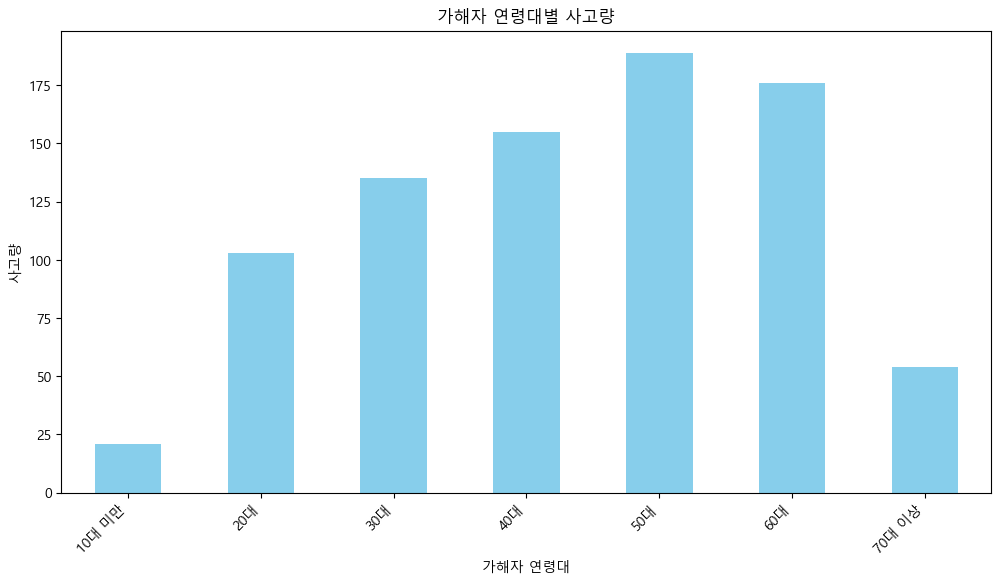

In [ ]:
# 가해자 연령대 레이블 생성
df['가해자_연령'] = df['가해운전자 연령'].apply(lambda x: int(x[:-1]) if x[-1] == '세' else 0)  # 세 제거 후 정수 변환
가해자_연령대 = pd.cut(df['가해자_연령'], bins=[0, 19, 29, 39, 49, 59, 69, 130], labels=['10대 이하', '20대', '30대', '40대', '50대', '60대', '70대 이상'], right=False)

# 가해자 연령대별 사고 수 계산
가해자_연령대별_사고수 = 가해자_연령대.value_counts().sort_index()

# 막대그래프 그리기
plt.figure(figsize=(12, 6))
가해자_연령대별_사고수.plot(kind='bar', color='skyblue')
plt.title('가해자 연령대별 사고량')
plt.xlabel('가해자 연령대')
plt.ylabel('사고량')
plt.xticks(rotation=45, ha='right')  # X축 레이블 회전
plt.show()

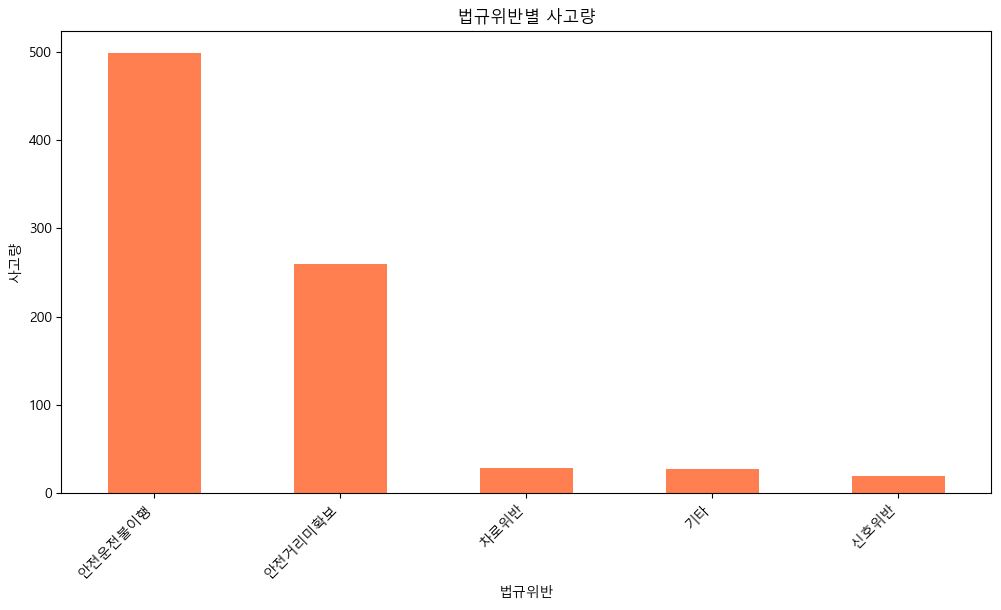

In [ ]:
# 법규위반별 사고 수 계산
법규위반별_사고수 = df['법규위반'].value_counts()

# 막대그래프 그리기
plt.figure(figsize=(12, 6))
법규위반별_사고수.plot(kind='bar', color='coral')
plt.title('법규위반별 사고량')
plt.xlabel('법규위반')
plt.ylabel('사고량')
plt.xticks(rotation=45, ha='right')  # X축 레이블 회전
plt.show()

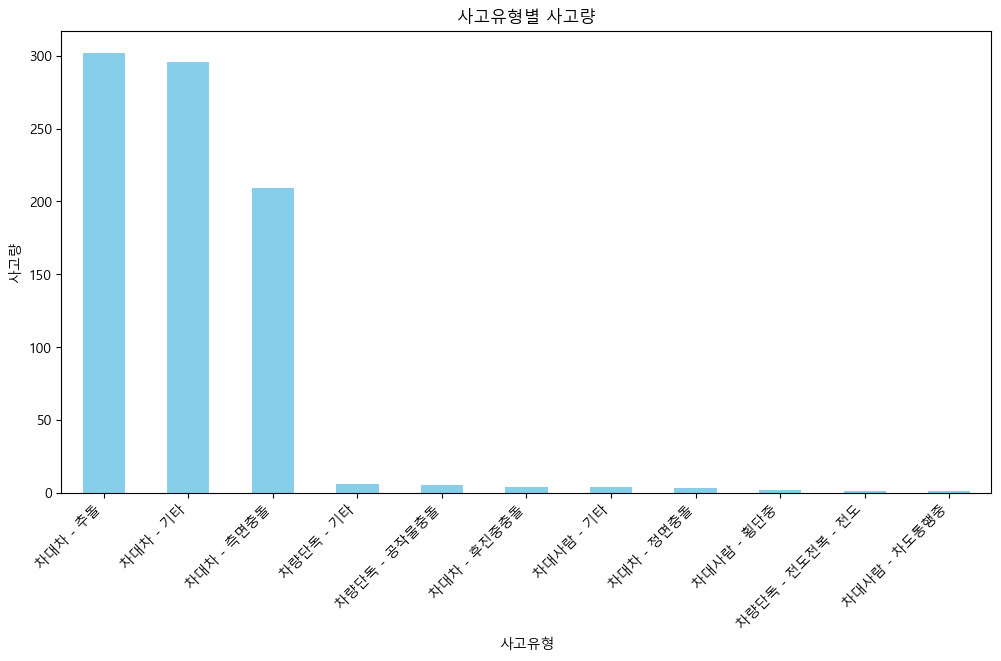

In [ ]:
# 사고유형별 사고 수 계산
사고유형별_사고수 = df['사고유형'].value_counts()

# 막대그래프 그리기
plt.figure(figsize=(12, 6))
사고유형별_사고수.plot(kind='bar', color='skyblue')
plt.title('사고유형별 사고량')
plt.xlabel('사고유형')
plt.ylabel('사고량')
plt.xticks(rotation=45, ha='right')  # X축 레이블 회전
plt.show()

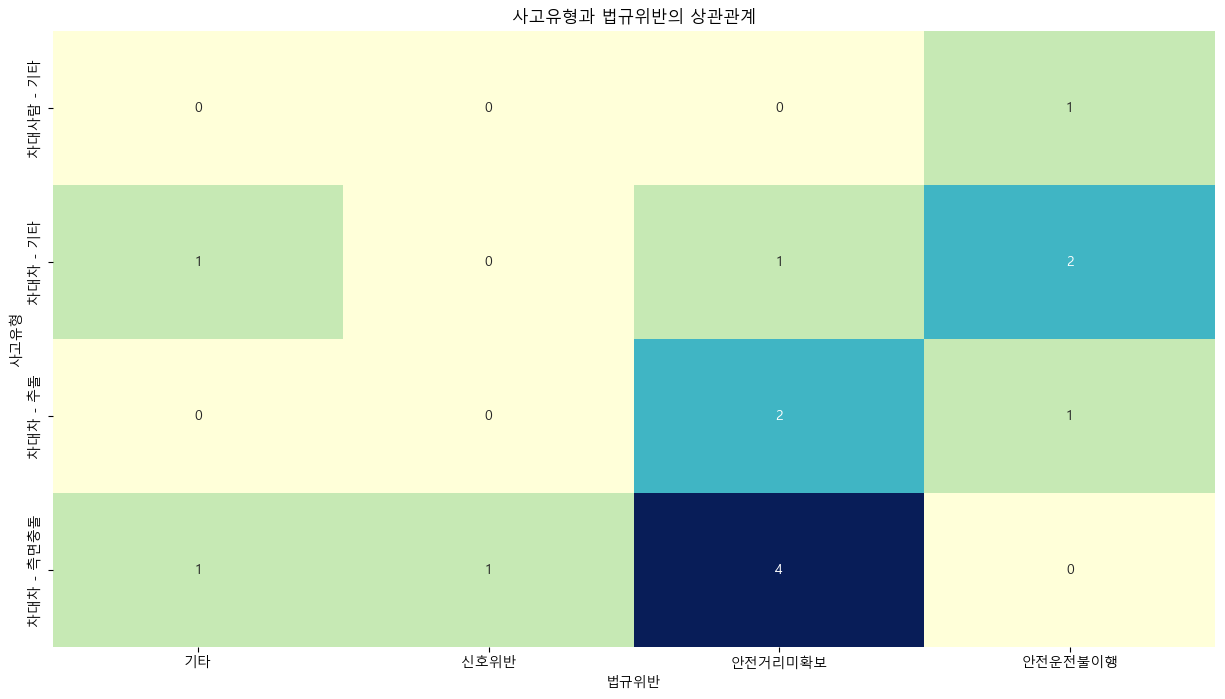

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 한글 폰트 경로 (Windows 기준)
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# CSV 파일 경로
file_path = './경부고속도로_부산광역시_accidentInfoList.csv'

# CSV 파일 읽기
df = pd.read_csv(file_path, delimiter=',', encoding='CP949')

# 사고유형과 법규위반의 교차표 생성
cross_table = pd.crosstab(df['사고유형'], df['법규위반'])

# 히트맵 그리기
plt.figure(figsize=(15, 8))
sns.heatmap(cross_table, annot=True, fmt='d', cmap='YlGnBu', cbar=False)
plt.title('사고유형과 법규위반의 상관관계')
plt.xlabel('법규위반')
plt.ylabel('사고유형')
plt.show()

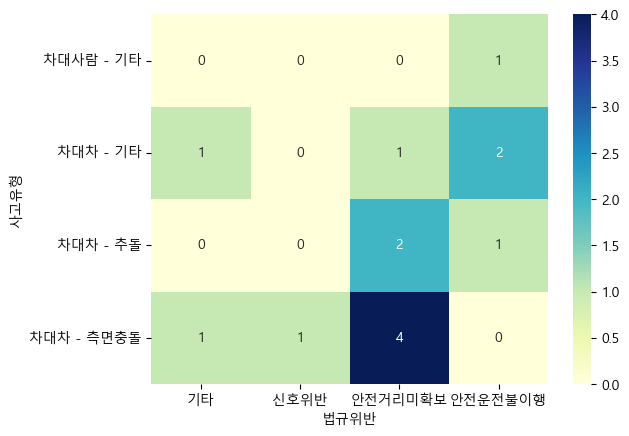

In [ ]:
cross_table = pd.crosstab(df['사고유형'], df['법규위반'])
sns.heatmap(cross_table, annot=True, cmap='YlGnBu', fmt="d")
plt.show()

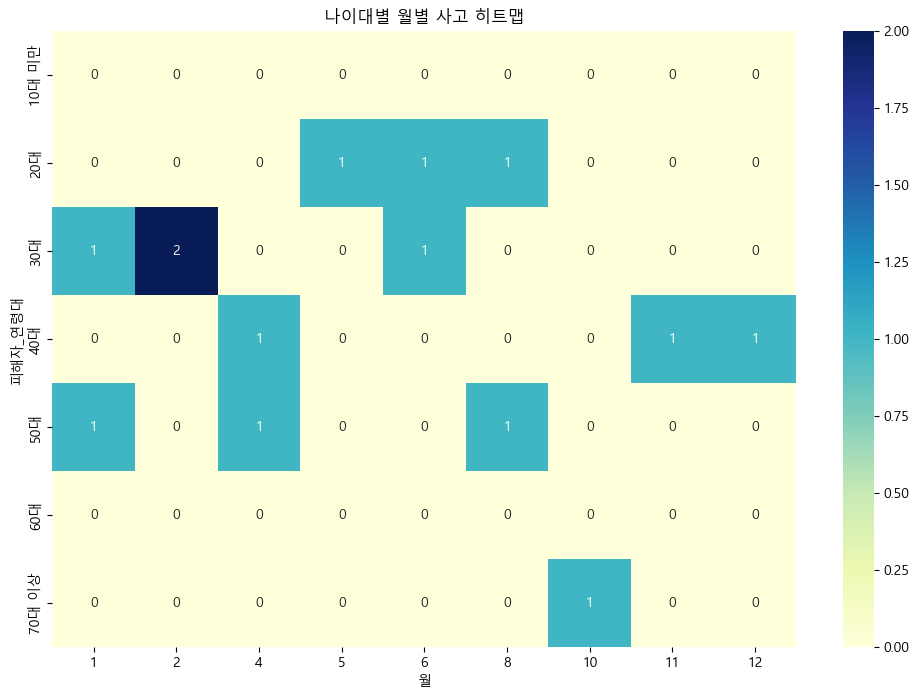

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# '사고일시' 컬럼을 datetime 형식으로 변환
df['사고일시'] = pd.to_datetime(df['사고일시'], format='%Y년 %m월 %d일 %H시')

# '월' 컬럼 추가
df['월'] = df['사고일시'].dt.month



# 피해자 연령대 레이블 생성
df['피해자_연령'] = df['피해운전자 연령'].apply(lambda x: int(x[:-1]) if x[-1] == '세' else 0)  # 세 제거 후 정수 변환
df['피해자_연령대'] = pd.cut(df['피해자_연령'], bins=[0, 19, 29, 39, 49, 59, 69, 130], labels=['10대 미만', '20대', '30대', '40대', '50대', '60대', '70대 이상'], right=False)

# 지역 및 월별 사고수를 계산
pivot_table = df.pivot_table(index='피해자_연령대', columns='월', values='사고번호', aggfunc='count', fill_value=0)

# 히트맵 생성
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt="d")
plt.title('나이대별 월별 사고 히트맵')
plt.show()

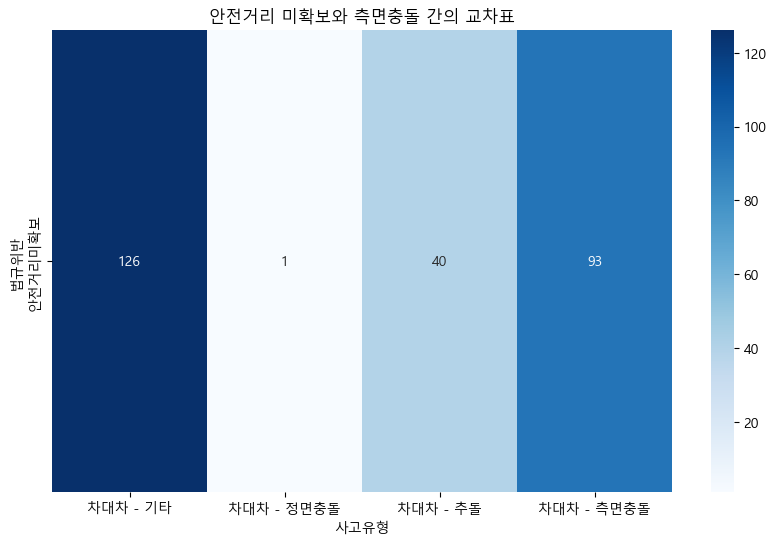

Chi-squared: 0.0
P-value: 1.0


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# 데이터 불러오기
df = pd.read_csv(file_path, delimiter=',', encoding='cp949')

# 안전거리 미확보와 측면충돌에 해당하는 데이터 추출
subset_df = df[df['법규위반'].isin(['안전거리미확보', '측면충돌'])]

# 교차표 생성
contingency_table = pd.crosstab(subset_df['법규위반'], subset_df['사고유형'])

# 카이제곱 검정
chi2, p, _, _ = chi2_contingency(contingency_table)

# 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')
plt.title('안전거리 미확보와 측면충돌 간의 교차표')
plt.show()

# 카이제곱 검정 결과 출력
print(f"Chi-squared: {chi2}")
print(f"P-value: {p}")

C:\Users\ogi\AppData\Local\Temp\ipykernel_8520\1881330359.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='월', y='측면충돌사고수', data=monthly_accidents, palette='viridis')


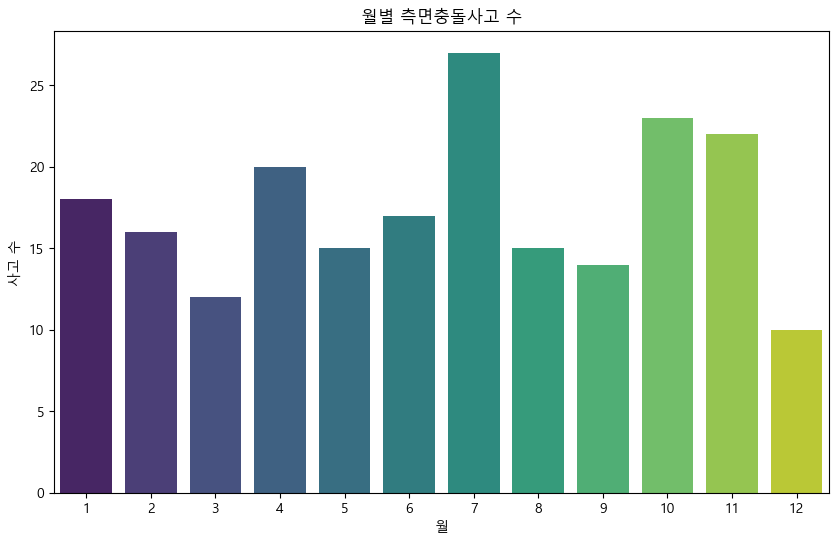

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기
file_path = './경부고속도로_전체_accidentInfoList.csv'
df = pd.read_csv(file_path, delimiter=',', encoding='cp949')

# '사고일시' 컬럼을 datetime 형식으로 변환
df['사고일시'] = pd.to_datetime(df['사고일시'], format='%Y년 %m월 %d일 %H시')

# '월' 컬럼 추가
df['월'] = df['사고일시'].dt.month

# '월'과 '사고유형'으로 필터링하여 데이터프레임 생성
monthly_accidents = df[df['사고유형'] == '차대차 - 측면충돌'].groupby('월').size().reset_index(name='측면충돌사고수')

# 막대 그래프 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='월', y='측면충돌사고수', data=monthly_accidents, palette='viridis')
plt.title('월별 측면충돌사고 수')
plt.xlabel('월')
plt.ylabel('사고 수')
plt.show()

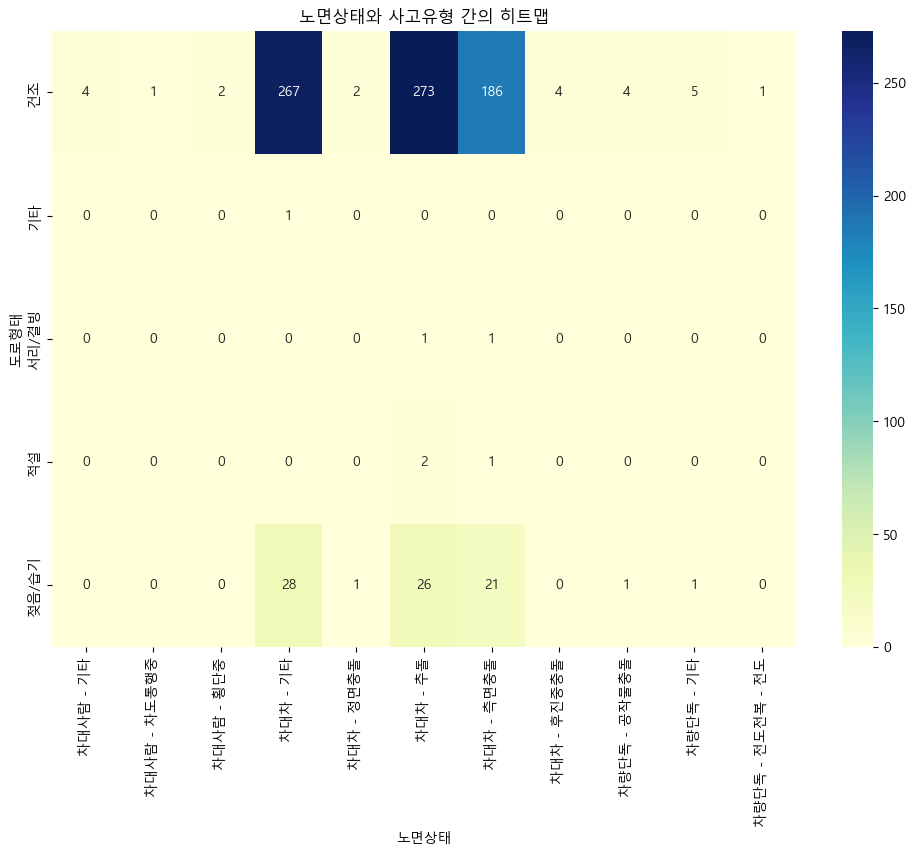

In [ ]:
# '도로형태'와 '사고유형'으로 필터링하여 교차표 생성
cross_table = pd.crosstab(df['노면상태'], df['사고유형'])

# 히트맵 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(cross_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title('노면상태와 사고유형 간의 히트맵')
plt.xlabel('노면상태')
plt.ylabel('도로형태')
plt.show()

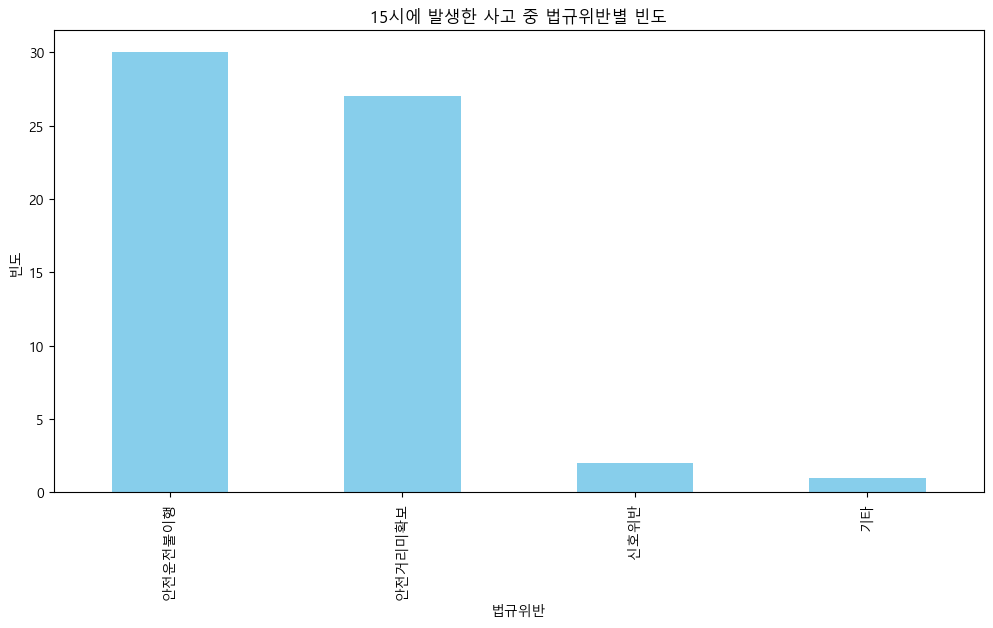

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 한글 폰트 경로 (Windows 기준)
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)


# 데이터 불러오기
file_path = './경부고속도로_전체_accidentInfoList.csv'
df = pd.read_csv(file_path, delimiter=',', encoding='cp949')

# '사고일시' 컬럼을 datetime 형식으로 변환
df['사고일시'] = pd.to_datetime(df['사고일시'], format='%Y년 %m월 %d일 %H시')

# 15시에 일어난 사고만 필터링
df_15시 = df[df['사고일시'].dt.hour == 15]

# 15시에 일어난 사고 중 법규위반의 빈도수 계산
법규위반_빈도 = df_15시['법규위반'].value_counts()

# 막대그래프 시각화
plt.figure(figsize=(12, 6))
법규위반_빈도.plot(kind='bar', color='skyblue')
plt.title('15시에 발생한 사고 중 법규위반별 빈도')
plt.xlabel('법규위반')
plt.ylabel('빈도')
plt.show()

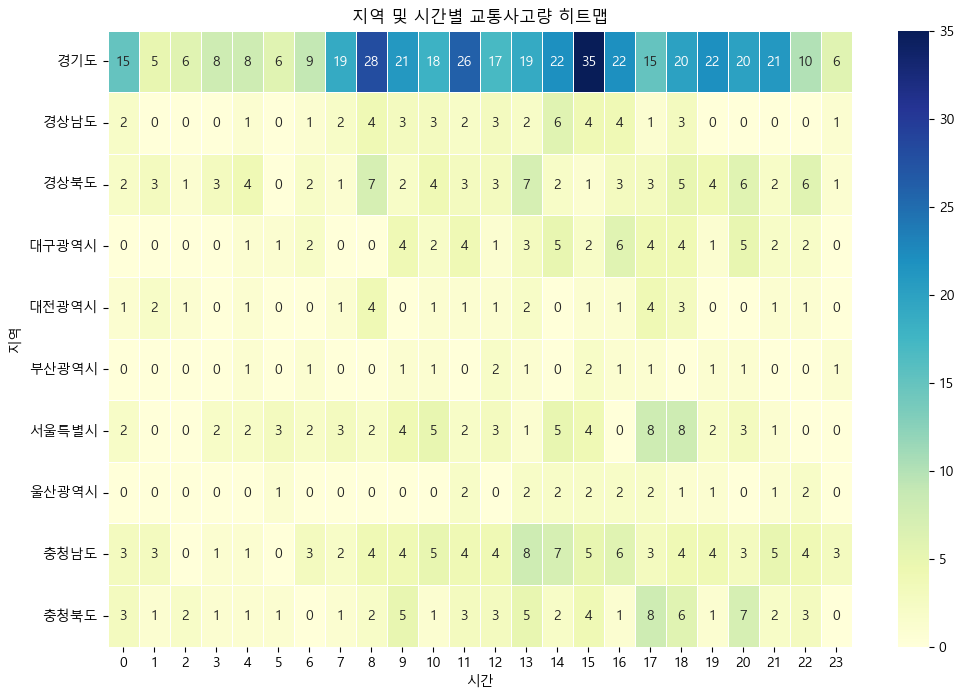

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 데이터 불러오기
file_path = './경부고속도로_전체_accidentInfoList.csv'
df = pd.read_csv(file_path, delimiter=',', encoding='cp949')

# '사고일시' 컬럼을 datetime 형식으로 변환
df['사고일시'] = pd.to_datetime(df['사고일시'], format='%Y년 %m월 %d일 %H시')

# 시간과 지역 추출
df['시간'] = df['사고일시'].dt.hour
df['지역'] = df['시군구'].str.split(' ').str[0]

# 지역에 대한 교통사고량 계산
heatmap_data = df.groupby(['지역', '시간']).size().unstack(fill_value=0)

# 히트맵 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='d', linewidths=.5)
plt.title('지역 및 시간별 교통사고량 히트맵')
plt.xlabel('시간')
plt.ylabel('지역')
plt.show()

ValueError: Unknown format code 'd' for object of type 'float'

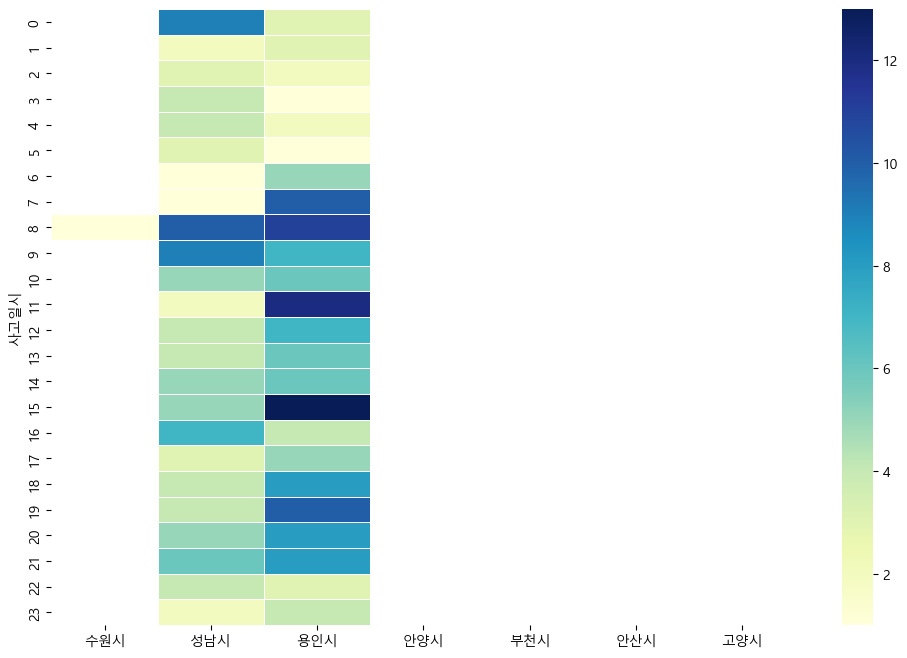

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 데이터 불러오기
file_path = './경부고속도로_전체_accidentInfoList.csv'
df = pd.read_csv(file_path, delimiter=',', encoding='cp949')

# '사고일시' 컬럼을 datetime 형식으로 변환
df['사고일시'] = pd.to_datetime(df['사고일시'], format='%Y년 %m월 %d일 %H시')

# 선택할 구 리스트
selected_gu_list = ['수원시', '성남시', '용인시', '안양시', '부천시', '안산시', '고양시', '용인시']

# 각 구에 해당하는 데이터프레임 생성
dfs_by_gu = {gu: df[df['시군구'].str.contains(gu)] for gu in selected_gu_list}

# 히트맵 시각화
fig, ax = plt.subplots(figsize=(12, 8))

heatmap_data = pd.DataFrame({gu: df_gu.groupby(df_gu['사고일시'].dt.hour).size() for gu, df_gu in dfs_by_gu.items()})

sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='d', linewidths=.5)
plt.title('경기도 특정 구 및 시간별 교통사고량 히트맵')
plt.xlabel('시간')
plt.ylabel('지역')
plt.show()